In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn as sk
%matplotlib inline

In [2]:
df = pd.read_csv('final.txt', sep=',', header=None)
df.columns = ['percent_h2s', 'flow_rate','cost']
df

,percent_h2s,flow_rate,cost
0,2.0,4400,131.4
1,1.0,1500,54.1
2,9.0,4500,406.9
3,8.0,3250,308.0
4,0.0,4000,0.0
...,...,...,...
99,9.0,5000,395.6
100,10.0,1250,246.8
101,9.0,1750,246.1
102,10.0,2000,238.5


In [3]:
df.columns

Index(['percent_h2s', 'flow_rate', 'cost'], dtype='object')

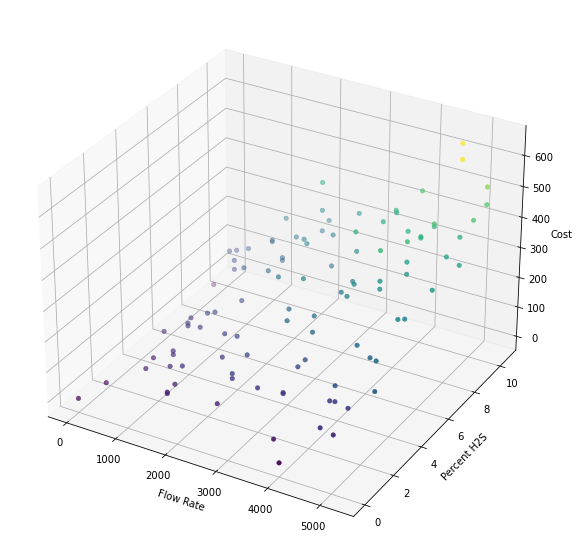

In [4]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Flow Rate")
ax.set_ylabel("Percent H2S")
ax.set_zlabel("Cost")
ax.scatter(df.flow_rate, df.percent_h2s, df.cost, c=df.cost, cmap='viridis', linewidth=0.5)
plt.show()

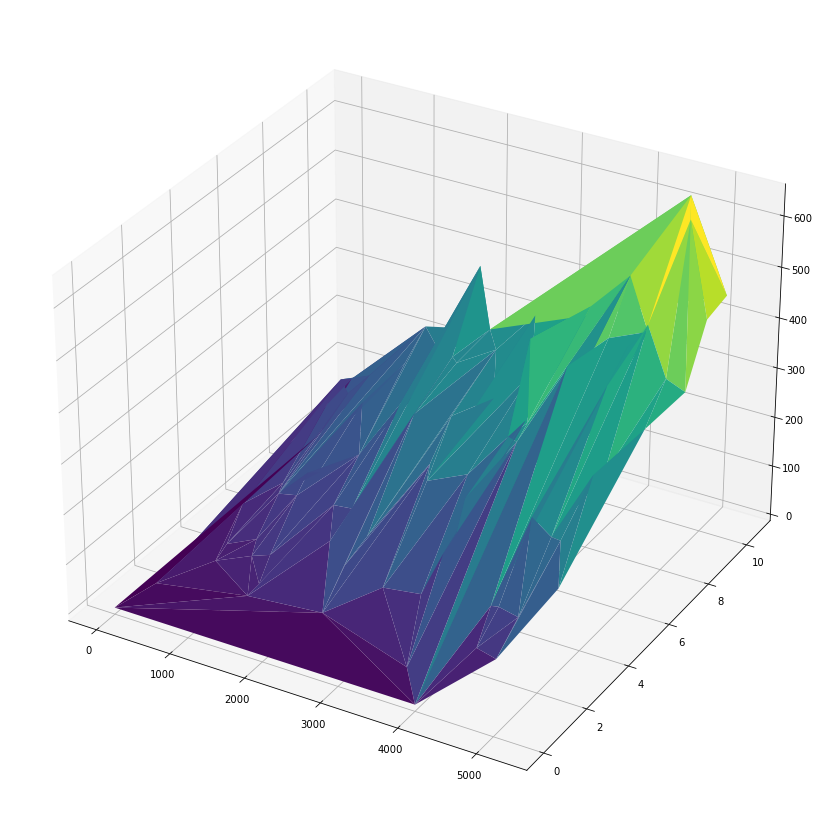

In [5]:
fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')
ax.plot_trisurf(df.flow_rate, df.percent_h2s, df.cost,
                cmap='viridis', edgecolor='none');

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
percent_h2s,104.0,5.653846,3.058552,0.0,3.000,6.0,8.125,10.5
flow_rate,104.0,2890.865385,1557.206305,0.0,1500.000,2875.0,4500.000,5250.0
cost,104.0,230.444231,141.370788,0.0,124.825,217.3,319.550,648.3


In [7]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [8]:
X_norm, mu, sigma = feature_normalize(df[['flow_rate', 'percent_h2s']])

In [9]:
df['flow_rate_normalized'] = X_norm[:,0]
df['percent_h2s_normalized'] = X_norm[:,1]
df[['flow_rate_normalized', 'percent_h2s_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
flow_rate_normalized,104.0,-1.024821e-16,1.0,-1.856443,-0.89318,-0.010188,1.033347,1.514979
percent_h2s_normalized,104.0,-1.387779e-16,1.0,-1.848537,-0.86768,0.113176,0.807949,1.584460


In [10]:
df

,percent_h2s,flow_rate,cost,flow_rate_normalized,percent_h2s_normalized
0,2.0,4400,131.4,0.969130,-1.194633
1,1.0,1500,54.1,-0.893180,-1.521585
2,9.0,4500,406.9,1.033347,1.094032
3,8.0,3250,308.0,0.230628,0.767080
4,0.0,4000,0.0,0.712259,-1.848537
...,...,...,...,...,...
99,9.0,5000,395.6,1.354435,1.094032
100,10.0,1250,246.8,-1.053724,1.420984
101,9.0,1750,246.1,-0.732636,1.094032
102,10.0,2000,238.5,-0.572092,1.420984


In [11]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [12]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [13]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))
y = np.array(df.cost.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [14]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

In [15]:
X
##### IMPORTANT: [___ , flowrate_normalized, percenth2s_normalized]

array([[ 1.        ,  0.96912953, -1.19463255],
       [ 1.        , -0.89317991, -1.52158461],
       [ 1.        ,  1.0333471 ,  1.09403191],
       [ 1.        ,  0.23062751,  0.76707985],
       [ 1.        ,  0.71225926, -1.84853668],
       [ 1.        , -1.05372383, -0.37725238],
       [ 1.        , -1.53535558,  1.09403191],
       [ 1.        ,  0.39117143,  0.44012778],
       [ 1.        ,  0.87280318,  0.11317571],
       [ 1.        , -1.53535558, -0.54072842],
       [ 1.        ,  0.39117143, -1.19463255],
       [ 1.        ,  1.19389101,  1.42098398],
       [ 1.        , -0.89317991, -1.19463255],
       [ 1.        , -1.53535558,  0.93055588],
       [ 1.        ,  1.51497885,  1.09403191],
       [ 1.        ,  0.39117143, -0.86768048],
       [ 1.        , -1.69589949, -1.52158461],
       [ 1.        , -0.53998329,  0.93055588],
       [ 1.        ,  1.0333471 ,  0.76707985],
       [ 1.        ,  0.87280318,  0.76707985],
       [ 1.        , -1.85644341, -1.848

In [16]:
# X[0][2]
feature_array=np.ones((104,6))
#feature_array = np.hstack((np.ones((m,1)),X_norm))

for i in range (0,103):
    for j in range(0,3):
        feature_array[i][j]=X[i][j]



for i in range (0,103):
    for j in range(3,5):
        feature_array[i][j]=feature_array[i][j-2]*feature_array[i][j-2]

for i in range (0,103):
    feature_array[i][5] = feature_array[i][1]*feature_array[i][2]



#####[___, flowrate, percent h2s, flowrate squared, percent h2s squared]
print(feature_array)

[[ 1.00000000e+00  9.69129530e-01 -1.19463255e+00  9.39212047e-01
   1.42714692e+00 -1.15775368e+00]
 [ 1.00000000e+00 -8.93179908e-01 -1.52158461e+00  7.97770348e-01
   2.31521973e+00  1.35904880e+00]
 [ 1.00000000e+00  1.03334710e+00  1.09403191e+00  1.06780622e+00
   1.19690582e+00  1.13051470e+00]
 [ 1.00000000e+00  2.30627512e-01  7.67079845e-01  5.31890492e-02
   5.88411489e-01  1.76909716e-01]
 [ 1.00000000e+00  7.12259263e-01 -1.84853668e+00  5.07313258e-01
   3.41708784e+00 -1.31663737e+00]
 [ 1.00000000e+00 -1.05372383e+00 -3.77252383e-01  1.11033390e+00
   1.42319360e-01  3.97519824e-01]
 [ 1.00000000e+00 -1.53535558e+00  1.09403191e+00  2.35731675e+00
   1.19690582e+00 -1.67972799e+00]
 [ 1.00000000e+00  3.91171429e-01  4.40127780e-01  1.53015087e-01
   1.93712463e-01  1.72165413e-01]
 [ 1.00000000e+00  8.72803180e-01  1.13175715e-01  7.61785391e-01
   1.28087424e-02  9.87801238e-02]
 [ 1.00000000e+00 -1.53535558e+00 -5.40728415e-01  2.35731675e+00
   2.92387219e-01  8.3021

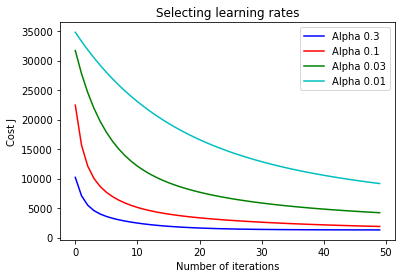

In [17]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(6,1))
    theta, J_history = gradient_descent(feature_array, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [18]:
iterations = 100
alpha = 0.3
theta = np.zeros(shape=(6,1))
theta, _ = gradient_descent(feature_array, y, theta, alpha, iterations)

print('Theta found by gradient descent:')


#theta form is:
    
print(theta)

Theta found by gradient descent:
[[245.74637619]
 [ 77.74531831]
 [ 92.57640449]
 [ -9.11423872]
 [-12.03305748]
 [ 33.88531919]]


In [19]:
percent_h2s1= (2 - mu[1])/sigma[1]
flow_rate1  = (4400 - mu[0])/sigma[0]
#y_pred = theta[4] + theta[3]*percent_h2s1*percent_h2s1 + theta[2]*flow_rate1*flow_rate1 + theta[1]*percent_h2s1 + theta[0]*flow_rate1
y_pred = theta[0] + theta[1]*flow_rate1 + theta[2]*percent_h2s1 + theta[3]*flow_rate1*flow_rate1 + theta[4]*percent_h2s1*percent_h2s1 + theta[5]*flow_rate1*percent_h2s1

f'Cost of a plant with flow rate 5250, percent h2s 10: {y_pred[0]}$'

# 2.0	4400	131.4

'Cost of a plant with flow rate 5250, percent h2s 10: 145.53287762827654$'

<Figure size 1080x1080 with 0 Axes>

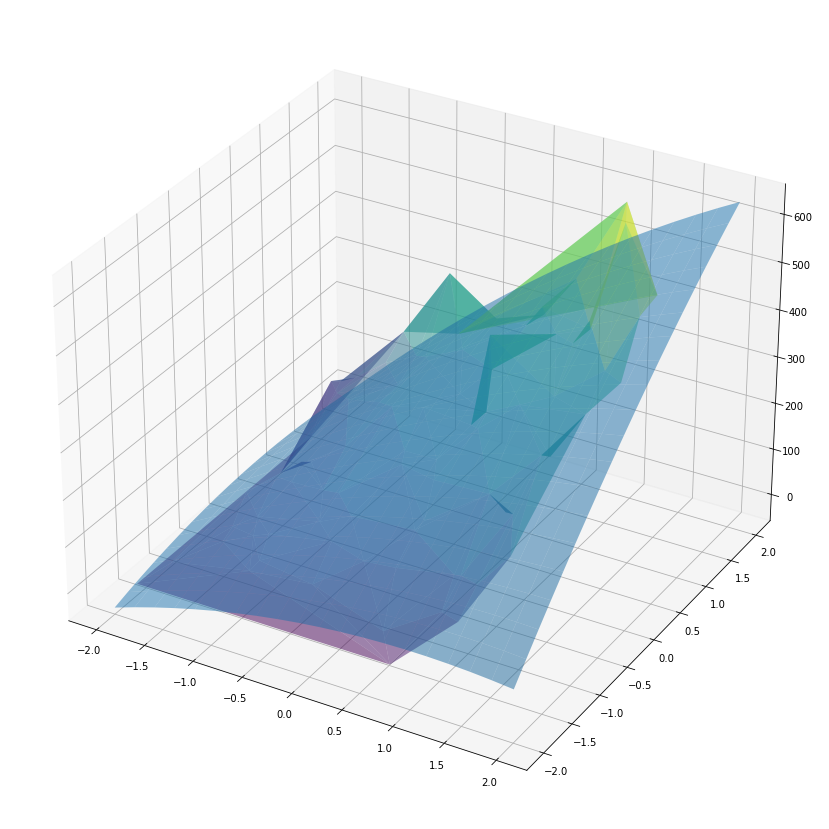

In [20]:


x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)

X,Y = np.meshgrid(x,y)
#Z = 230.44423077*X + 94.92117824*Y + 81.77285407
Z = theta[0] + theta[1]*Y + theta[2]*X + theta[3]*Y*Y + theta[4]*X*X + theta[5]*X*Y

fig = plt.figure(figsize=(15,15))
# ax = fig.(projection='3d')



fig1 = plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot_trisurf(df.flow_rate_normalized, df.percent_h2s_normalized, df.cost,
                cmap='viridis', edgecolor='none', alpha=0.5);

# ax.scatter(df.flow_rate_normalized, df.percent_h2s_normalized, df.cost, cmap='viridis', color='red', linewidth=0.5);

In [21]:
expected_cost = df.cost
expected_cost

0      131.4
1       54.1
2      406.9
3      308.0
4        0.0
       ...  
99     395.6
100    246.8
101    246.1
102    238.5
103    127.1
Name: cost, Length: 104, dtype: float64

In [22]:
predicted_cost = [None] * 104
    
for i in range(104):
    percent_h2s1 = (df.percent_h2s[i] - mu[1])/sigma[1]
    flow_rate1 = (df.flow_rate[i] - mu[0])/sigma[0]    
    temp = theta[0] + theta[1]*flow_rate1 + theta[2]*percent_h2s1 + theta[3]*flow_rate1*flow_rate1 + theta[4]*percent_h2s1*percent_h2s1 + theta[5]*flow_rate1*percent_h2s1
    #print(df.percent_h2s[i],percent_h2s1," ",df.flow_rate[i],flow_rate1," ",temp, df.cost[i])
    
    if(temp<0):
        temp=0
    
    predicted_cost[i]=temp
    
predicted_cost

[array([145.53287763]),
 array([46.36454855]),
 array([441.53898988]),
 array([333.11955475]),
 array([39.6338542]),
 array([130.53731365]),
 array([134.85550547]),
 array([319.01188155]),
 array([320.33011179]),
 array([79.44945987]),
 array([131.16096372]),
 array([490.31353449]),
 array([77.4233977]),
 array([132.20908851]),
 array([485.65206957]),
 array([173.87636969]),
 array([6.40241759]),
 array([259.80848479]),
 array([407.14466711]),
 array([393.27929893]),
 0,
 array([316.25626157]),
 array([522.80971914]),
 array([125.72028203]),
 array([149.83229412]),
 array([69.87736471]),
 array([284.04477458]),
 array([433.46592204]),
 array([218.95365033]),
 array([119.43455248]),
 array([358.74345362]),
 array([370.17773314]),
 array([146.75389524]),
 array([106.57601542]),
 array([153.51540885]),
 array([228.78512411]),
 array([205.11868012]),
 array([94.35129405]),
 array([225.92578504]),
 array([95.29631306]),
 array([438.04555392]),
 array([277.99187801]),
 array([445.92180879]),

In [23]:
#Calculating mean absolute error
temp=0
for i in range(104):
    temp+= abs(predicted_cost[i]-df.cost[i])

error=temp/104
error

array([27.18013696])

In [24]:
#Calculating mean absolute error by percentage
temp=0
for i in range(104):
    if(df.cost[i]==0):
        continue
    temp+=100*(   abs(predicted_cost[i]-df.cost[i])  /   (df.cost[i])  )

error=temp/104
error

array([11.73744559])

# Final value of theta is given below. 
Formula used in equation is:

y_pred = theta[0] + theta[1]*flow_rate1 + theta[2]*percent_h2s1 + theta[3]*flow_rate1*flow_rate1 + theta[4]*percent_h2s1*percent_h2s1 + theta[5]*flow_rate1*percent_h2s1


In [25]:
print(theta)

[[245.74637619]
 [ 77.74531831]
 [ 92.57640449]
 [ -9.11423872]
 [-12.03305748]
 [ 33.88531919]]
